## Module Title:	 Data Visualization Techniques  & Machine Learning for Business 
### Assessment Title: Integrated CA
### Lecturer Name:	 David McQuaid  & PhD Muhammad Iqbal
### Student Full Name & Student ID:	Natalia de Oliveira Rodrigues 2023112

### GitHub Repository: 
https://github.com/norodrigues111/Recommendation-System-and-Market-Basket-Analysis.git

### Dataset Source:
https://www.kaggle.com/datasets/rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba

# Introduction

This academic paper aims to deliver a critical analysis of the knowledge produced, in the course: Higher Diploma in Science in Data Analytics for Business at CCT College. It integrates Machine Learning for Business, and Data Visualizations subjects. 

This innovative project involves Content and Collaborative filtering techniques to develop a Recommendation System, and so provide personalized suggestions. Going beyond traditional recommendation methodologies, this paper also incorporates Market Basket Analysis to identify associations and enhance the recommendation process. For the Market Basket Analysis, we have applied Apriori and FP-Growth algorithms, and the result's comparison is provided in this paper. 

To facilitate user interaction and understanding, we have worked in Python to develop a dynamic dashboard that presents the system's insights and recommendations in an intuitive and visually appealing manner.


In [1]:
#!pip install dash dash-core-components dash-html-components dash-table plotly

In [2]:
#!pip install dash-bootstrap-components

In [3]:
#!pip install plotly

In [4]:
#!pip install pandas

In [5]:
# Import required libraries
import pandas as pd
import seaborn as sns
import numpy as np
from numpy import asarray
import statistics as stats
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook
sns.set(color_codes=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import sigmoid_kernel
from scipy.spatial.distance import cosine

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

import dash
from dash import dcc
from dash import html
#import dash_core_components as dcc
#import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
#import dash_table
from dash import dash_table
from dash.dash_table.Format import Group

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

import warnings
warnings.filterwarnings('ignore')

C:\Users\User\anaconda3\Lib\site-packages\dash\_jupyter.py:31: DeprecationWarning: The `ipykernel.comm.Comm` class has been deprecated. Please use the `comm` module instead.For creating comms, use the function `from comm import create_comm`.
  _dash_comm = Comm(target_name="dash")


In [6]:
df = pd.read_csv('Groceries data.csv')

## Exploratory Data Analysis (EDA)

In [7]:
def glimpse(df):
    print(f'Observations: {df.shape[0]} rows \nAttributes: {df.shape[1]} columns')
    print("-" * 100)
    display(df.head())
    print("-" * 100)
    display(df.describe())
    print("-" * 100)
    display(f'Missing values: {df.isnull().sum().sum()}')
    print("-" * 100)
    display(df.info())
    
df = df
glimpse(df)

Observations: 38765 rows 
Attributes: 7 columns
----------------------------------------------------------------------------------------------------


,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


----------------------------------------------------------------------------------------------------


,Member_number,year,month,day,day_of_week
count,38765.000000,38765.000000,38765.000000,38765.000000,38765.000000
mean,3003.641868,2014.528518,6.477570,15.753231,3.014498
std,1153.611031,0.499193,3.431561,8.801391,1.987669
min,1000.000000,2014.000000,1.000000,1.000000,0.000000
25%,2002.000000,2014.000000,4.000000,8.000000,1.000000
50%,3005.000000,2015.000000,6.000000,16.000000,3.000000
75%,4007.000000,2015.000000,9.000000,23.000000,5.000000
max,5000.000000,2015.000000,12.000000,31.000000,6.000000


----------------------------------------------------------------------------------------------------


'Missing values: 0'

----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
 3   year             38765 non-null  int64 
 4   month            38765 non-null  int64 
 5   day              38765 non-null  int64 
 6   day_of_week      38765 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.1+ MB


None

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

# The Purpose of Recommendation Systems in Machine Learning for Online Retail Businesses

According to (Wikipedia Contributors, 2019), online retail, also well known as eCommerce, allows customers to buy goods or services using web-based technology. Electronic Commerce permit businesses all over the world, the opportunity to collect customers' data. Technology makes it possible to build customers’ profiles based on demographic data, purchase history, preferences, and active data such as likes, views, clicks, and time spent. 

According to the research (Bertens, Guitart and Chen Andáfrica Periáñez, 2018), E-commerce frequently uses recommendation systems, which are typically implemented using cooperative filtering techniques. Based on user ratings, they compare comparable products or users.

AI has helped businesses to build powerful analytics tools to improve customer satisfaction and drive revenue. Recommendation Systems enable businesses to learn about their customers and provide more meaningful content, increasing customer satisfaction, and driving business revenue (Nawrocka, Kot and Nawrocki, 2018).
Industry leaders in online retail are using recommendation systems. According to (Arkadiusz, 2021), Amazon’s recommendations are responsible for 35% of revenue, and Netflix’s recommendations are responsible for 80% of the movies seen on the platform. In 2023, according to (Cooper and McLachlan, 2023), 70% of the videos watched on YouTube were recommended to their customers.

Recommendation engines enable customers to find goods or services using different algorithms. They are Content-based filtering, based on item features and user profile data; Collaborative-based filtering, based on the similarity with other users (user-to-user or item-to-item); and Hybrid systems that combine Content-based filtering, and Collaborative-based filtering. 


## Item Based Content Filtering

In [9]:
rs_df = df.copy()

In [10]:
rs_df['Quantity'] = 1

In [11]:
# Replace NaN with an empty string
rs_df['itemDescription'] = rs_df['itemDescription'].fillna('')

In [12]:
rs_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week,Quantity
0,1808,2015-07-21,tropical fruit,2015,7,21,1,1
1,2552,2015-05-01,whole milk,2015,5,1,4,1
2,2300,2015-09-19,pip fruit,2015,9,19,5,1
3,1187,2015-12-12,other vegetables,2015,12,12,5,1
4,3037,2015-01-02,whole milk,2015,1,2,4,1


In [13]:
rs_df.head()['itemDescription']

0      tropical fruit
1          whole milk
2           pip fruit
3    other vegetables
4          whole milk
Name: itemDescription, dtype: object

In [14]:
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
rs_df['itemDescription'] = rs_df['itemDescription'].fillna('')

In [15]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(rs_df['itemDescription'])

In [16]:
# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix[:1000], tfv_matrix[:1000])

In [17]:
sig[9]

array([0.76294559, 0.76159416, 0.7618768 , 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76294559,
       0.76188085, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76177271, 0.76174927, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76294559, 0.76294559, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76177271, 0.76159416, 0.76159416, 0.76188085, 0.76159416,
       0.76294559, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76174927, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76294559, 0.76159416,
       0.76159416, 0.76159416, 0.76159416, 0.76159416, 0.76159

In [18]:
# Reverse mapping of indices and items names
indices = pd.Series(rs_df.index, index=rs_df['itemDescription']).drop_duplicates()

In [19]:
indices

itemDescription
tropical fruit               0
whole milk                   1
pip fruit                    2
other vegetables             3
whole milk                   4
                         ...  
sliced cheese            38760
candy                    38761
cake bar                 38762
fruit/vegetable juice    38763
cat food                 38764
Length: 38765, dtype: int64

In [20]:
indices['whole milk']

itemDescription
whole milk        1
whole milk        4
whole milk        8
whole milk       21
whole milk       53
              ...  
whole milk    38667
whole milk    38672
whole milk    38688
whole milk    38689
whole milk    38745
Length: 2502, dtype: int64

In [21]:
n_idx = indices['oil']

In [22]:
#sig[n_idx]

In [23]:
#list(enumerate(sig[indices['whole milk']]))

In [24]:
def give_rec(itemDescription, sig=sig):
    # Get the index corresponding to items
    idx = indices[itemDescription].iloc[0]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the items 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar items
    sig_scores = sig_scores[1:11]

    # item indices
    item_indices = [i[0] for i in sig_scores]

    # Top 10 most similar items
    return rs_df['itemDescription'].iloc[item_indices]

In [25]:
# Testing our content-based recommendation system with the seminal film Spy Kids
give_rec('whole milk')

4      whole milk
8      whole milk
21     whole milk
53     whole milk
54     whole milk
64     whole milk
70     whole milk
72     whole milk
97     whole milk
106    whole milk
Name: itemDescription, dtype: object

## Item Based Collaborative Filtering

In [26]:
# Pivot the DataFrame from long to wide format
user_item_matrix = rs_df.pivot_table(index='Member_number', columns='itemDescription', values='Quantity', aggfunc='sum', fill_value=0)

In [27]:
user_item_matrix.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [28]:
user_item_matrix.loc[1000,:]

itemDescription
Instant food products    0
UHT-milk                 0
abrasive cleaner         0
artif. sweetener         0
baby cosmetics           0
                        ..
white bread              0
white wine               0
whole milk               2
yogurt                   1
zwieback                 0
Name: 1000, Length: 167, dtype: int64

In [29]:
#Drop the Person column
data_cf = user_item_matrix.copy()

In [30]:
data_cf = data_cf.reset_index()

In [31]:
#Drop the member number column
data_cf = data_cf.drop("Member_number", axis=1)

In [32]:
# Create a placeholder dataframe listing item vs. item
data_icf = pd.DataFrame(index=data_cf.columns,columns=data_cf.columns)

In [33]:
for i in range(0,len(data_icf.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(data_icf.columns)) :
      # Fill in placeholder with cosine similarities
      data_icf.iloc[i,j] = 1-cosine(data_cf.iloc[:,i],data_cf.iloc[:,j])

In [34]:
data_sims1 = user_item_matrix.reset_index()

In [35]:
data_sims1.head()

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1,1001,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,2,0,0
2,1002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [36]:
# Create a place holder matrix for similarities, and fill in the user name column
data_sims = pd.DataFrame(index=data_sims1.index,columns=data_sims1.columns)
data_sims.iloc[:,:1] = data_sims1.iloc[:,:1]

In [37]:
# This is the same as our original data but with nothing filled in except the headers
data_sims.head()

itemDescription,Member_number,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
data_neighbours = pd.DataFrame(index=data_icf.columns,columns=range(1,12))
 
# Loop through our similarity dataframe and fill in neighbouring item names
for i in range(0,len(data_icf.columns)):
    data_neighbours.iloc[i,:11] = data_icf.iloc[0:,i].sort_values(ascending=False)[:11].index

In [39]:
# Print a sample
data_neighbours.iloc[:,1:11]

,2,3,4,5,6,7,8,9,10,11
itemDescription,,,,,,,,,,
Instant food products,root vegetables,margarine,soda,whole milk,chocolate,chicken,soups,hard cheese,newspapers,yogurt
UHT-milk,other vegetables,whole milk,rolls/buns,soda,tropical fruit,bottled water,shopping bags,frankfurter,yogurt,root vegetables
abrasive cleaner,frozen potato products,meat spreads,spread cheese,sausage,other vegetables,rolls/buns,frankfurter,root vegetables,frozen meals,shopping bags
artif. sweetener,baby cosmetics,make up remover,bottled water,whole milk,instant coffee,soda,hair spray,tropical fruit,turkey,misc. beverages
baby cosmetics,skin care,artif. sweetener,oil,frankfurter,frozen dessert,cake bar,spread cheese,pot plants,domestic eggs,chewing gum
...,...,...,...,...,...,...,...,...,...,...
white bread,whole milk,rolls/buns,other vegetables,soda,whipped/sour cream,yogurt,root vegetables,bottled water,shopping bags,sausage
white wine,whole milk,soda,sausage,yogurt,rolls/buns,other vegetables,root vegetables,citrus fruit,domestic eggs,tropical fruit
whole milk,other vegetables,rolls/buns,yogurt,soda,tropical fruit,sausage,bottled water,root vegetables,bottled beer,shopping bags


In [40]:
# Specify the index you want to retrieve attributes for
selected_index = 'whole milk'

# Get the list of 5 attributes for the specified index
attributes_list = data_neighbours.loc[selected_index] #.tolist()

# Print the result
print(f"Attributes for '{selected_index}':")
attributes_list[1:11]

Attributes for 'whole milk':


2     other vegetables
3           rolls/buns
4               yogurt
5                 soda
6       tropical fruit
7              sausage
8        bottled water
9      root vegetables
10        bottled beer
11       shopping bags
Name: whole milk, dtype: object

In [41]:
# Specify the index you want to retrieve attributes for
selected_index = 'whole milk'

# Get the list of 10 attributes for the specified index
attributes_list = data_neighbours.loc[selected_index, 2:11].tolist()

# Print the result
print(f"Attributes for '{selected_index}':")
print(attributes_list)



Attributes for 'whole milk':
['other vegetables', 'rolls/buns', 'yogurt', 'soda', 'tropical fruit', 'sausage', 'bottled water', 'root vegetables', 'bottled beer', 'shopping bags']


# Comparative Analysis of Content and Collaborative Filtering: Machine Learning Models for Item-Item Collaborative Filtering

### Content Filtering Vs Collaborative Filtering:

According to (Shivam, 2022), Content Filtering, recommends items based on the content similarity of items. It relies on the items’ characteristics. While Collaborative Filtering, recommends items based on user-item interactions, finding items that are similar in terms of user preferences. It is well known, that the choice between content-based and collaborative filtering depends on the specific use case and the available data.

For Content Filtering, TF-IDF (Term Frequency-Inverse Document Frequency) and sigmoid kernel for similarity computation were used as a method. In this paper, content filtering fails to recommend similar items based on the users’ preferences. All results from the recommendation list are like the given item. The chosen dataset does not bring information regarding items, only the names. The paper evaluates that the dataset is not suitable for content filtering, once it relies too much on item features.

For Collaborative Filtering, the cosine similarity method was used to build a user-item matrix between columns. Given an item 'whole milk', collaborative filtering recommends similar items based on the preferences of users who liked 'whole milk.' The similarity is calculated using the user-item interaction matrix. The results show the top 5 items that are most like 'whole milk' include 'other vegetables,' 'rolls/buns,' 'yogurt,' 'soda,' and 'tropical fruit.' It is successfully capturing personalized recommendations.


# Justification of Recommendations: Conceptual Insights for the Chosen Scenario

In conclusion, in the content filtering results, it seems like the system is recommending the same item ('whole milk') rather than similar items. This is because the content-based filtering approach is designed to recommend items that are similar in content to the given item, and in this case, 'whole milk' is considered most like itself.

Given that, this paper recommends the use of Collaborative Filtering. It is effective in capturing personalized recommendations. Collaborative filtering is recommending items that are frequently co-purchased or interacted with by users who have also interacted with 'whole milk'. So, in collaborative filtering, you see a list of items that tend to be chosen by users who have chosen 'whole milk', and these items are different from 'whole milk' itself.


# Market Basket Analysis: Applying Apriori and FP-Growth Algorithms to Extract Insights

## Market Basket Analysis

In retail organizations, market basket analysis is a crucial part of analytical CRM. Finding correlations or co-occurrences from transactional data through analysis can enable you to offer related products together, increasing revenue in the process. Many businesses have heavily relied on market basket analysis to identify product linkages and inform retailer promotion strategies (Charlet and Kumar, 2012). 

According to (Manpreet and Shivani, 2016), affinity analysis or association rule learning are other names for market basket analysis (MBA). In the retail industry, it gives retailers the knowledge they need to comprehend customer purchasing patterns and make informed decisions.


In [42]:
mba_df = pd.read_csv('basket.csv')

In [43]:
mba_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
# Transpose the DataFrame
df_transposed = mba_df.transpose()

# Convert each row to a list of items, ensuring all items are strings
transactions = df_transposed.apply(lambda row: [str(item) for item in row.dropna()], axis=1).tolist()

# Convert the list of lists into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [45]:
# Apriori Algorithm
frequent_itemsets_apriori = apriori(df_encoded, min_support=0.8, use_colnames=True, max_len=3)

# Apriori Association Rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.8)

In [46]:
print("\nApriori Association Rules:")
rules_apriori_table = rules_apriori[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                                     'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

rules_apriori_table.sort_values(by='confidence', ascending=False).drop_duplicates(subset='antecedents').head(10)


Apriori Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(canned beer),(butter),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6404,"(sugar, frozen vegetables)",(hard cheese),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6406,(sugar),"(hard cheese, frozen vegetables)",0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6407,(frozen vegetables),"(hard cheese, sugar)",0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6408,"(hard cheese, whipped/sour cream)",(frozen vegetables),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6409,"(hard cheese, frozen vegetables)",(whipped/sour cream),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6410,"(whipped/sour cream, frozen vegetables)",(hard cheese),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6411,(hard cheese),"(whipped/sour cream, frozen vegetables)",0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6412,(whipped/sour cream),"(hard cheese, frozen vegetables)",0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6414,"(white bread, frozen vegetables)",(hard cheese),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0


In [47]:
# FP-Growth Algorithm
frequent_itemsets_fpgrowth = fpgrowth(df_encoded, min_support=0.8, use_colnames=True, max_len=3) 

# FP-Growth Association Rules
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.8)

In [48]:
rules_fpgrowth_table = rules_fpgrowth[['antecedents', 'consequents', 'antecedent support', 'consequent support',
                                       'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]
print("\nFP-Growth Association Rules:")
rules_fpgrowth_table.sort_values(by='confidence', ascending=False).drop_duplicates(subset='antecedents').head(10)


FP-Growth Association Rules:


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(whole milk),(newspapers),0.818182,0.909091,0.818182,1.0,1.100000,0.07438,inf,0.5
6435,"(hygiene articles, rolls/buns)",(sugar),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6437,(hygiene articles),"(sugar, rolls/buns)",0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6438,(sugar),"(hygiene articles, rolls/buns)",0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6439,(rolls/buns),"(hygiene articles, sugar)",0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6440,"(hard cheese, sugar)",(rolls/buns),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6441,"(hard cheese, rolls/buns)",(sugar),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6442,"(sugar, rolls/buns)",(hard cheese),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6443,(hard cheese),"(sugar, rolls/buns)",0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0
6447,"(sugar, frozen vegetables)",(rolls/buns),0.818182,0.818182,0.818182,1.0,1.222222,0.14876,inf,1.0


# Major Divergence Between Models: A Comparative Analysis of Machine Learning Results Using Apriori and FP-Growth Algorithms

### The major divergence between models:

Machine Learning Models Apriori and FP-Growth have the same main objective of identifying frequent itemsets in transaction datasets. Both approaches are to find patterns in the data, revealing important patterns in the data, in machine learning outputs. Apriori and FP-Growth are machine learning algorithms used for Market Basket analysis, but they have different approaches. Apriori is a kind of candidate generation method, that scans candidate itemsets until finds the frequent ones. 

In contrast, FP-Growth uses the frequency pattern on the data to growth approach, creating a tree, that is called FP-Tree. The tree represents the dataset and efficiently mining in two passes. This distinction leads to significant divergences in efficiency. This distinction leads to significant divergences in efficiency. When working with large datasets and sparse data, Apriori necessitates numerous database scans, which increases computational costs and memory use. In contrast, FP-Growth reduces runtime, memory requirements, and scan times, which makes it a better option for association rule mining jobs.

### Comparison and contrast of the machine learning results:

In this Market Basket Analysis, as given before, the association rules are created from two different algorithms, Apriori and FP-Growth. The results show the revealed associations between items in data based on their support, confidence, lift, and other metrics. 

According to (Charlet and Kumar, 2012), frequent itemsets are used to generate association rules, with support and confidence serving as threshold values. The term "frequent itemset" refers to collections of items with the least amount of support. The percentage of transactions in the data set that contain an itemset is known as the itemset’s support. The degree of assurance or dependability connected to each pattern that is found is known as confidence. The generated association rules rely on confidence.

In the Apriori results, the rules reveal strong associations between items such as "canned beer" and "butter," "sugar" and "hard cheese," and various combinations of "frozen vegetables," "whipped/sour cream," and "hard cheese." 
On the other hand, the FP-Growth results show associations like "whole milk" and "newspapers," as well as patterns involving "hygiene articles," "rolls/buns," and "sugar." Like Apriori, the lift values are greater than 1, suggesting positive correlations.

For both algorithms, the lift values are consistently above 1, indicating positive associations. Lift is a metric that quantifies the degree to which the consequent is more likely than expected given the antecedent. A rule with a high lift indicates that buying the antecedent also greatly increases the likelihood of buying the consequent. A confidence of 0.8 means there is an 80% likelihood that the associated set of items. it measures the likelihood that the consequent item will be bought if the antecedent item is bought. The high confidence and lift indicate a strong association between the antecedent and the consequent.

In conclusion, it is crucial to note that, due to the algorithm’s methodologies, the specific associations and patterns discovered may vary. FP-Growth uses a frequent pattern growth strategy, while Apriori uses a candidate generation approach. FP-Growth shows to be more efficient, with quicker execution. Both algorithms reveal associations in the data, but the specific rules, efficiency of computation and memory usage are different from one to another. 


# Designing an Interactive Dashboard for Older Adults (65+): Incorporating Features to Summarize Key Data Aspects and Justifying Dataset Suitability for Machine Learning Models in Online Retail

This project developed a sophisticated and impressive interactive Uder-friendly dashboard aimed at older adults (+65). The objective of the dashboard is to summarise important aspects of the data used to apply recommendation systems algorithms, insights, trends, and machine learning results.

Why old adults?  In 2022, 771 million individuals worldwide were over 65 years of age or older, making up about 10% of the world's population (Alvarez, 2023). And according to (Tong, 2023) by the end of 2031, more than 25% of the workforce will be composed of older adults, in the G7 countries. 

The Dashboard Header contains its title Groceries Sales Dashboard. 

On the header left corner, below the title, it is possible to select the date range. It allows users to visualize any period wanted in the data. 

On the central top section of the dashboard, users can utilize a dropdown to select their preferred frequency for data visualization including options like day, day of the week, and month. 
On the header right corner, another dropdown allows users to pick a specific item. The resulting dash table, positioned in the top right grid, displays the top 10 items recommended by the Item-based Recommendation System analysed in the first part of this paper.

In addition to the recommendation table cited above, other three visualizations are provided: The Line graph showing the number of items sold that interacts with the date range picker and the data frequency dropdown. The Bar graph shows the Top 10 products sold, and the bottom 10 products sold table. Bar graph and bottom 10 table, both interact with the date range picker. 

Users can get significant insights from the data in a quick navigation, such as:

- A noticeable increase in sales in 2015 compared to 2014.
- August exhibits the highest sales performance, while February represents the lowest performance in the year 2015.
- Wednesdays demonstrate the best sales performance, while Mondays indicate the lowest. This insight could drive decision-makers in scheduling advertising for Wednesdays when the supermarket is expected to be at full capacity and creating sales campaigns for Mondays to boost sales.
- The bar graph reveals the most sold items, with the ability to discern seasonal patterns if used in collaboration with the data range picker, such as items selling the most in December close to Christmas.
- The dash table showing the bottom 10 products sold assists decision-makers in evaluating products that may need to be discontinued or included in promotional deals to increase sales.
- The dash table generated by the item-based recommendation system facilitates quick assessment and comparison of recommended items.



In [49]:
from my_function import update_items_sold_bar_plot

In [54]:
# Produce the Dash app
app = dash.Dash(__name__)

# Produce the dashboard Layout 
app.layout = html.Div([
    html.H1("Groceries Sales Dashboard", style={'textAlign': 'center', 'fontSize': 50,
                                                'font-family': 'Arial', 'color': '#440154'}), # Dashboard title

    # Create dashboard top using html.Div
    html.Div([
        
        # Create date range picker (position: TOP LEFT)
        html.Div([
            html.Div(children="Select Date Range", className="menu-title", 
                     style={'fontSize': 30, 'font-family': 'Arial'}),
            dcc.DatePickerRange(
                id="date-range-picker",
                start_date=df['Date'].min().date(),
                end_date=df['Date'].max().date(),
                display_format="YYYY-MM-DD",
                className='date-picker'),
        ], style={'flex': 3.5, 'margin': '20px', 'textAlign': 'center'}),  

        # Generate aggregation dropdown to select data frequency (position: TOP CENTER)
        html.Div([
            html.Div(children="Select Data Frequency", className="menu-title", 
                     style={'fontSize': 30, 'font-family': 'Arial'}),
            dcc.Dropdown(
                id='aggregation-dropdown',
                options=[
                    {'label': 'Day', 'value': 'day'},
                    {'label': 'Day of Week', 'value': 'day_of_week'},
                    {'label': 'Month', 'value': 'month'}],
                value='month',
                multi=False,
                style={'width': '100%', 'margin': 'auto', 'font-family': 'Arial', 'fontSize': 24},),
        ], style={'flex': 3, 'margin': '20px'}),  

        # Create dropdown for select item for recommendation system  (position: TOP RIGHT)
        html.Div([
            html.Div(children="Select Item for Recommendations", className="menu-title", 
                     style={'fontSize': 30, 'font-family': 'Arial'}),
            dcc.Dropdown(
                id='item-dropdown',
                options=[{'label': item, 'value': item} for item in user_item_matrix.columns],
                value='whole milk',  
                multi=False,
                style={'width': '100%', 'margin': 'auto', 'font-family': 'Arial', 'fontSize': 24},),
        ], style={'flex': 2.5, 'margin': '20px'}), 
    ], style={'display': 'flex', 'justify-content': 'space-between'}),  

    # Produce the dashboard body (Arrange grid 2x2)
    
    # Dashboard TOP row
    html.Div([
              
        # Produce a bar graph (position: TOP LEFT)
        html.Div([
            dcc.Graph(id='bar-plot-items-sold'),], style={'flex': 7.5, 'fontSize': 30}),

        # Display recommendation system dash table (position: TOP RIGHT)
        html.Div([
            html.H3("Item-based Recommendation System", style={'font-family': 'Arial', 'fontSize': 30}),
            dash_table.DataTable(
                id='recommendation-table',
                columns=[
                    {'name': 'Rank', 'id': 'Rank'},
                    {'name': 'Recommended Item', 'id': 'RecommendedItem'},],
                style_table={'height': '400px', 'overflowY': 'auto','border': '1px solid black','width': '500px'},
                style_cell={'textAlign': 'center'},),
        ], style={'flex': 2.5, 'fontSize': 24, 'margin-left': '20px'}),
    ], style={'display': 'flex', 'justify-content': 'space-between', 'margin': '20px'}),

    # Dashboard BOTTON row 
    html.Div([
        
        # Produce top 10 Products bar graph (position: BOTTOM LEFT)
        html.Div([
            dcc.Graph(id='top-10-bar-plot'),
        ], style={'flex': 7.5, 'fontSize': 24, 'margin-left': '20px'}),

        # Produce bottom 10 Products dash table (position: BOTTOM RIGHT)
        html.Div([
            html.H3("Bottom 10 Products", style={'font-family': 'Arial', 'fontSize': 30}),
            dash_table.DataTable(
                id='bottom-10-table',
                columns=[
                    {'name': 'Item', 'id': 'itemDescription'},
                    {'name': 'Quantity Sold', 'id': 'Quantity'}],
                style_table={'height': '400px', 'overflowY': 'auto', 'border': '1px solid black', 'width': '500px'},
                style_cell={'textAlign': 'center'},),
        ], style={'flex': 2.5, 'fontSize': 24}),
    ], style={'display': 'flex', 'justify-content': 'space-between', 'margin': '20px'}),

])

# Set callback to update the bar graph and tables based on the selected date range and aggregation period
@app.callback(
    Output('bar-plot-items-sold', 'figure'),
    Output('top-10-bar-plot', 'figure'),
    Output('bottom-10-table', 'data'),
    Output('recommendation-table', 'data'),
    [Input('date-range-picker', 'start_date'),
     Input('date-range-picker', 'end_date'),
     Input('aggregation-dropdown', 'value'),
     Input('item-dropdown', 'value')])

def update_items_sold_callback(start_date, end_date, aggregation_period, selected_item):
    
    # Call the function my_function.py from external source
    line_fig, top_10_bar_fig, bottom_10_data, recommendation_table_data = update_items_sold_bar_plot(
        df, start_date, end_date, aggregation_period, selected_item, data_neighbours)
        
    return line_fig, top_10_bar_fig, bottom_10_data, recommendation_table_data


# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8055)

## Interactive Sales Dashboard Illustration

http://127.0.0.1:8055/

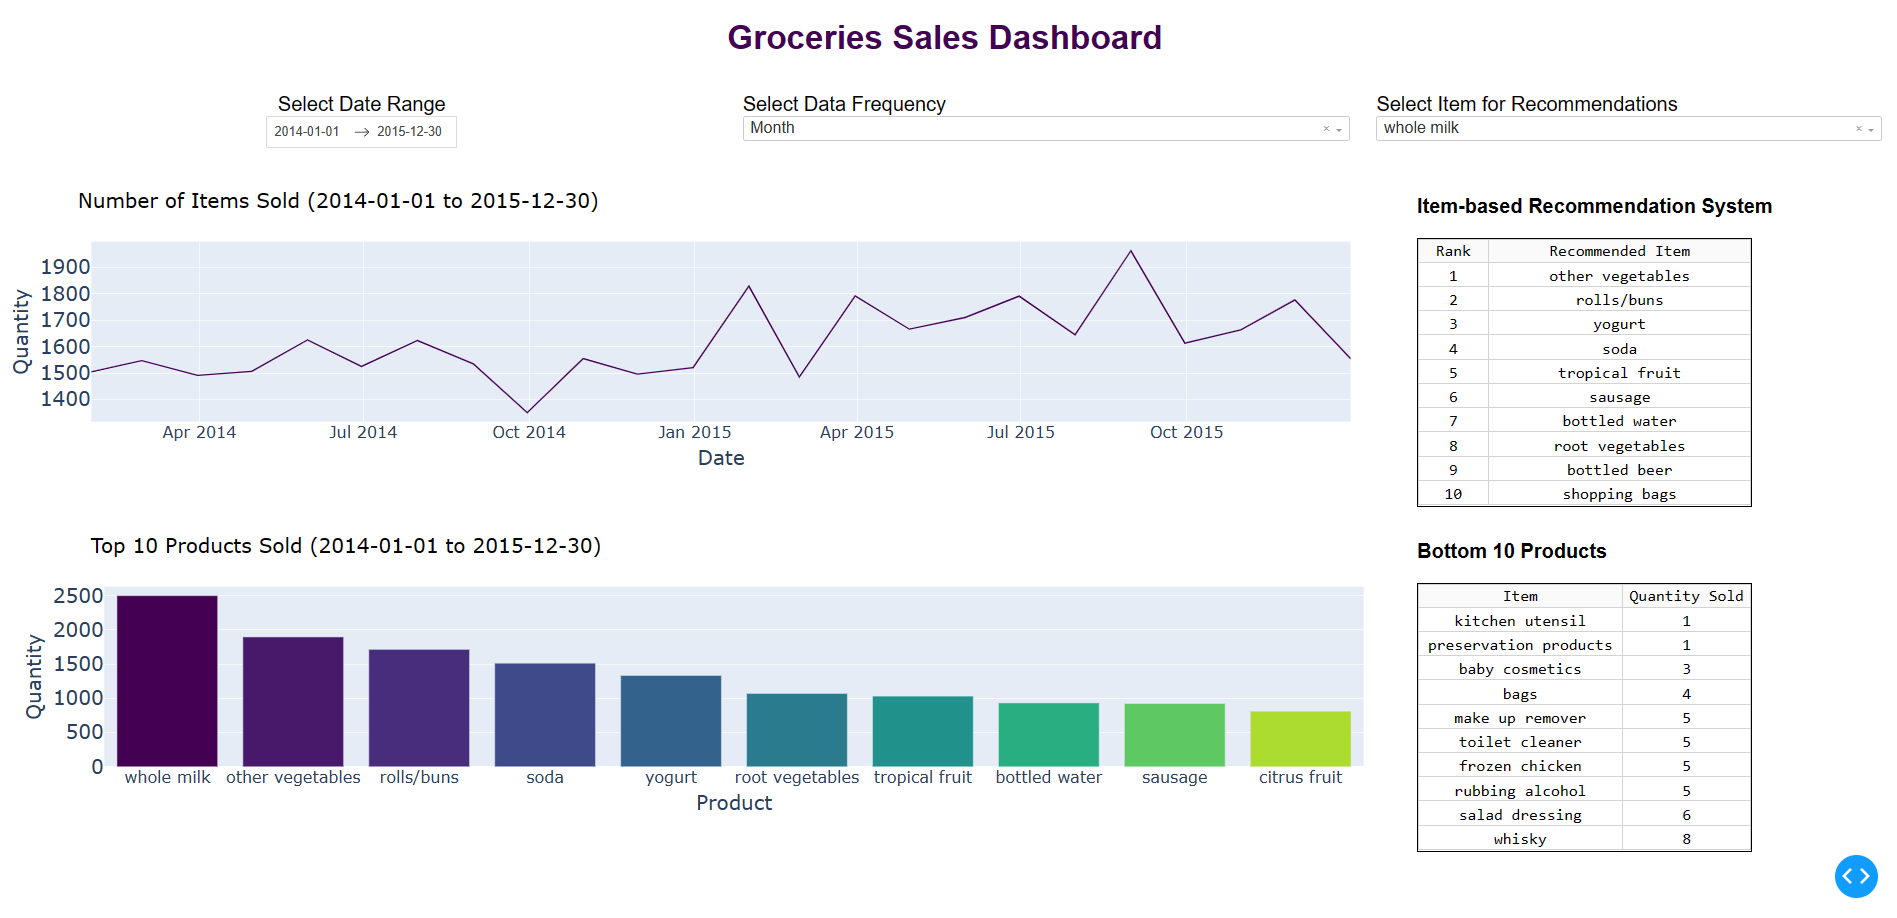

# Designing a User-Friendly Dashboard for Older Adults: Considerations and Strategies for Addressing Age-Related Challenges in Interface Design

It is well known, that ageing comes with inevitable physiological and cognitive changes. Design choices are made to overcome the challenges faced by older adults.

According to (Polyuk, 2019) vision loss is what affect old user the most. It is important to consider visual accessibility when creating a visualization, especially increasing colour contrast. In this Dashboard project, the palette viridis is used. This palette contributes to a positive user experience, offering smooth transitions between colours, and avoiding confusion in interpreting the data usually caused by abrupt changes. 

(Polyuk, 2019)  Also states that text and font size should be kept large as much as possible. Minimum of 16px. In this paper, large fonts are used. Especially for the dashboard title 50px and visualization titles 30px. Other font sizes are set as 24px.

To improve the interaction of older adults, this dashboard is sophisticated but simple. Containing gestures simple to perform such as simple horizontal, or vertical movements. 

According to (Barros, Leitão and Ribeiro, 2014) It is recommended pickers, dropdowns or checkboxes to the use of the keyboard be minimized. In this dashboard project, date ranger pick is added using dcc.DatePickerRange and two dropdowns are added as well, data frequency and item for recommendations dropdowns. 

In short, the dashboard layout is easy to understand. It's neat, making it clear what's important in the data, and it gives valuable insights to help decision-makers.


## Conclusion

In conclusion, this academic paper explores the cross-disciplinary field of data analytics, combining Machine Learning and Data Visualization to produce a solid Recommendation System and Market Basket Analysis. This paper favours Collaborative filtering over Content filtering due its customized effectiveness. In the MBA making use of Apriori and FP-Growth algorithms, with FP-Growth proving more efficient for the chosen dataset.

In the second part, the paper introduces a stunning and sophisticated interactive dashboard, produced in Dash, adapted for older adults. The dashboard prioritizes visual accessibility with large fonts, a user-friendly interface, simplified gestures, and a clean layout. Addressing the challenges associated with aging, the Groceries Sales dashboard allow users to select data ranges, visualize wanted data frequencies, and display personalized recommendations. Providing valuable insights to help decision-makers promote informed strategies. 

In heart, the project highlights the integration between advanced analytics, machine learning, and user-friendly interfaces in interpreting complex data related to the dynamic landscape of online retail.


# Reference List

- Alvarez, P. (2023). Charted: The World’s Aging Population from 1950 to 2100. [online] Visual Capitalist. Available at: https://www.visualcapitalist.com/cp/charted-the-worlds-aging-population-1950-to-2100/ [Accessed 28 Nov. 2023].

- Barros, A.C. de, Leitão, R. and Ribeiro, J. (2014). Design and Evaluation of a Mobile User Interface for Older Adults: Navigation, Interaction and Visual Design Recommendations. Procedia Computer Science, 27, pp.369–378. doi:https://doi.org/10.1016/j.procs.2014.02.041.

- Ezz, M. and Elshenawy, A. (2019). Adaptive recommendation system using machine learning algorithms for predicting student’s best academic program. Education and Information Technologies, [online] 25(4), pp.2733–2746. doi:https://doi.org/10.1007/s10639-019-10049-7.

- Khanal, S.S., Prasad, P.W.C., Alsadoon, A. and Maag, A. (2019). A systematic review: machine learning based recommendation systems for e-learning. Education and Information Technologies. [online] doi:https://doi.org/10.1007/s10639-019-10063-9.

- Polyuk, S. (2019). A guide to interface design for older adults. [online] Toptal Design Blog. Available at: https://www.toptal.com/designers/ui/ui-design-for-older-adults [Accessed 25 Nov. 2023].

- Portugal, I., Alencar, P. and Cowan, D. (2018). The use of machine learning algorithms in recommender systems: A systematic review. Expert Systems with Applications, [online] 97, pp.205–227. doi:https://doi.org/10.1016/j.eswa.2017.12.020.

- Roy, P.K., Chowdhary, S.S. and Bhatia, R. (2020). A Machine Learning approach for automation of Resume Recommendation system. Procedia Computer Science, [online] 167, pp.2318–2327. doi:https://doi.org/10.1016/j.procs.2020.03.284.

- Tong, G.C. (2023). ‘Massive shift’: Older people will exceed a quarter of G7’s workforce by 2031, report says. [online] CNBC. Available at: https://www.cnbc.com/2023/07/19/aging-workforce-older-people-to-fill-over-150-million-jobs-globally.html [Accessed 11 2023].